## Compito di esame

Data la funzione

$$f(x)=\frac{sin^2(x+7/2)\cdot exp(1/5-2\cdot x)}{log(x+5)}$$

Scrivere lo script python  in cui

-  a) si disegni in figura 1 il grafico di f e si dica quanti zeri reali ha la funzione nel dominio [−2, 4];
                                                 Punti: 2
-  b) si utilizzi il metodo di Newton per determinare le radici dell’equazione f(x) = 0 con iterati iniziali x0 = −1 e x0 = 4, assumendo come tolleranza per il test d’arresto sull’incremento tolx = 1.e − 15 e come tolleranza per il test del residuo tolf = 1.e − 15; 
                                                                                                        Punti: 5

-  c) si disegni in figura 2 l’andamento deegli iterati ottenute a partire dai valori di innesco x0 = −1 e x0 = 4;
                                                                                                       Punti: 2

- d) si calcoli, nei due casi implementati al punto b), una stima dell’ordine di convergenza del metodo;
                                                 Punti: 3
- e) qualora l’ordine di convergenza non risulti ottimale, si modifichi opportunamente il metodo di Newton per renderlo tale (motivando la modifica implementata). 
                                                Punti: 4


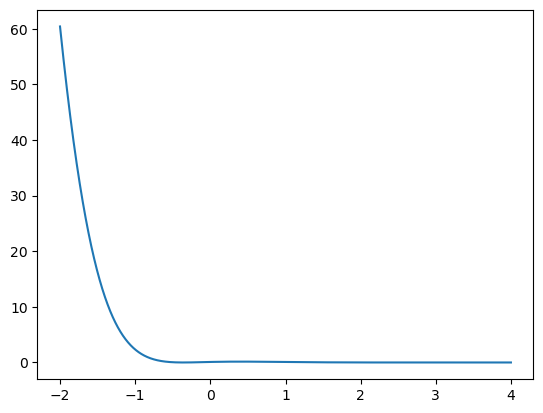

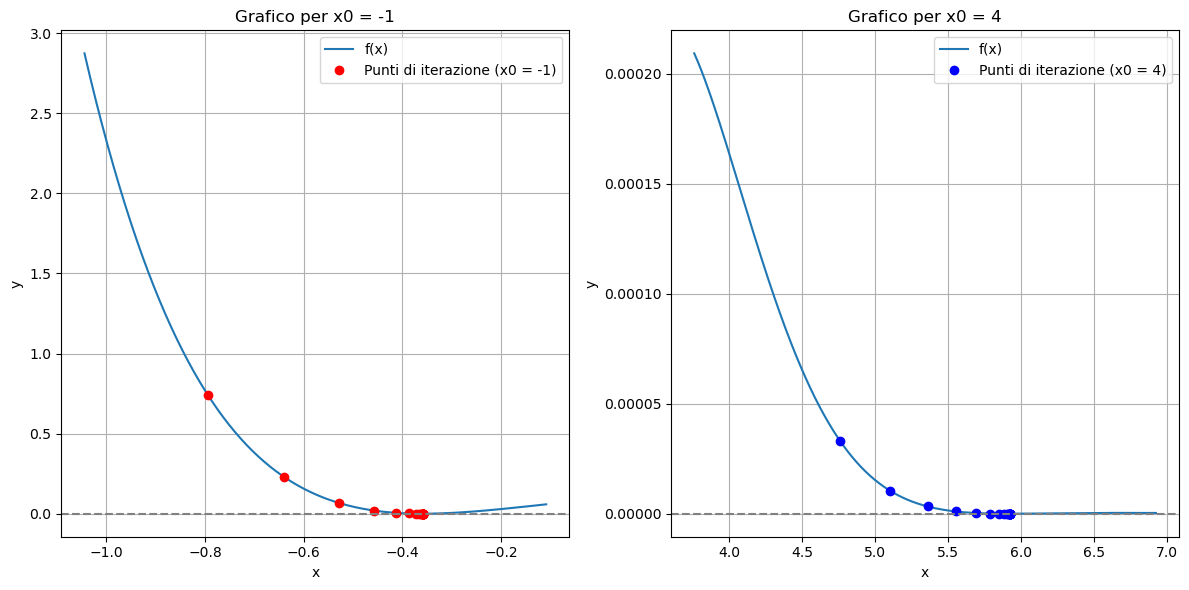

In [37]:
import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf

x = sym.symbols('x')

f_sym = ((sym.sin(x + 7/2))**2 * sym.exp( 1/5 -2*x))/(sym.log(x+5))
fd_sym = sym.diff(f_sym, x)
f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)

xx = np.arange(-2, 4, 0.001)

plt.plot(xx, f(xx))

tolx = 1e-15
tolf = 1e-15
nmax = 1000

x0_1 = -1
x0_2 = 4

zero_nwt_1, num_it_nwt_1, vec_sol_nwt_1 = sf.newton(f, fd, x0_1, tolx, tolf, nmax)
vec_sol_nwt_1 = np.array(vec_sol_nwt_1)
zero_nwt_2, num_it_nwt_2, vec_sol_nwt_2 = sf.newton(f, fd, x0_2, tolx, tolf, nmax)
vec_sol_nwt_2 = np.array(vec_sol_nwt_2)

xx1 = np.linspace(min(vec_sol_nwt_1) -0.25, max(vec_sol_nwt_1) +0.25, 400)
xx2 = np.linspace(min(vec_sol_nwt_2) -1, max(vec_sol_nwt_2) +1 , 400)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(xx1, f(xx1), label = 'f(x)')
plt.plot(vec_sol_nwt_1, f(vec_sol_nwt_1), 'ro',  label='Punti di iterazione (x0 = -1)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafico per x0 = -1')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(xx2, f(xx2), label = 'f(x)')
plt.plot(vec_sol_nwt_2, f(vec_sol_nwt_2), 'bo', label='Punti di iterazione (x0 = 4)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafico per x0 = 4')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()






